In [1]:
# Importing required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df=pd.read_csv(r"C:\Users\pds\Documents\Housing.csv")


# Basic checks

In [2]:
# Checking its shape (rows × columns)
df.shape

(545, 13)

In [3]:
# Preview first 5 rows
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# Check overall dataset info: rows, columns, datatypes, missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
# unique count per column
df.nunique().sort_values()

guestroom             2
basement              2
mainroad              2
hotwaterheating       2
airconditioning       2
prefarea              2
furnishingstatus      3
bathrooms             4
parking               4
stories               4
bedrooms              6
price               219
area                284
dtype: int64

In [6]:
# Duplicates check
print("Duplicates:", df.duplicated().sum())

Duplicates: 0


# Type separation

In [7]:
# Column types
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

print("Numerical:", num_cols)
print("Categorical:", cat_cols)

Numerical: Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')
Categorical: Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')


# Numeric summary

In [8]:
# Summary stats for numerical columns
numeric_summary = df[num_cols].describe().T
# Add missing, skewness, kurtosis
numeric_summary["missing"] = df[num_cols].isnull().sum()
numeric_summary["mode"] = df[num_cols].mode().iloc[0]
numeric_summary["skewness"] = df[num_cols].skew()
numeric_summary["kurtosis"] = df[num_cols].kurt()
# Add correlation with price
corr_matrix = df.corr(numeric_only=True)
numeric_summary["corr_with_price"] = corr_matrix["price"]

numeric_summary

,count,mean,std,min,25%,50%,75%,max,missing,mode,skewness,kurtosis,corr_with_price
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0,0,3500000.0,1.212239,1.960130,1.000000
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0,0,6000.0,1.321188,2.751480,0.535997
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0,0,3.0,0.495684,0.728323,0.366494
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0,0,1.0,1.589264,2.164856,0.517545
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0,0,2.0,1.082088,0.679404,0.420712
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0,0,0.0,0.842062,-0.573063,0.384394


# Storytelling Summary (Numerical Features)

Price → Distribution is heavily right-skewed with heavy-tails. Most houses fall around the median of 4.34M, but a handful of luxury properties reach 13.3M, which inflates the mean upward (4.77M).

Area (ρ = 0.54) → Strongest numerical driver of price. Properties cluster between 3,600–6,360 sq.ft., but some outliers stretch above 16,000 sq.ft., clearly tied to the top price bracket. Distribution is highly skewed (1.32) and leptokurtic (2.75).

Bathrooms (ρ = 0.52) → Sharp separator of standard vs. premium homes. Highly skewed (1.59) → Majority have 1–2 bathrooms, while properties with 3–4 bathrooms consistently mark higher-end houses.

Stories (ρ = 0.42) → Adding extra floors increases value, Positive skew (1.08) shows a concentration of low-rise houses, with a smaller group of 3–4 story upscale builds.

Parking (ρ = 0.38) → Parking shows moderate positive impact. The typical house has 0–1 slot, but homes with 2–3 slots lean upscale.

Bedrooms (ρ = 0.37) → Correlated with price, but the effect is weaker since bedroom count overlaps with area. The market norm is 3 bedrooms, which represents the middle tier of houses.

# Statistical Takeaways

Right skew + high kurtosis in price and area confirm a stretched luxury tail.

Quartiles: show the bulk of properties in the mid-market (25% = 3.43M, 75% = 5.74M), with only the top quartile pulling prices upward.

Mode vs Spread: The "typical house" = 3 bedrooms, 1 bathroom, 2 stories, 0–1 parking slot.

Price differentiation comes mainly from bathrooms, stories, and parking → not just size.

# Categorical summary

In [9]:
# Basic categorical describe
cat_summary = df.describe(include='object').T

# Add percent of top freq
cat_summary["percent_freq"] = [
    df[col].value_counts(normalize=True)[df[col].mode()[0]] * 100
    for col in cat_summary.index
]

# Round for readability
cat_summary["percent_freq"] = cat_summary["percent_freq"].round(2)

cat_summary


,count,unique,top,freq,percent_freq
mainroad,545,2,yes,468,85.87
guestroom,545,2,no,448,82.20
basement,545,2,no,354,64.95
hotwaterheating,545,2,no,520,95.41
airconditioning,545,2,no,373,68.44
prefarea,545,2,no,417,76.51
furnishingstatus,545,3,semi-furnished,227,41.65


# Storytelling Summary (Categorical Features)

Mainroad → Nearly all houses (86%) sit on a main road. This feature is more of a baseline expectation than a differentiator, since only a minority of homes are off-road.

Guestroom → Most properties (82%) lack a guestroom. The small share that do include one are clear markers of premium/larger houses.

Basement → Similarly, 65% of homes don’t have basements. Presence of a basement is relatively rare and often signals higher-value properties.

Hotwaterheating → Extremely uncommon (95% have none). The few with this feature stand out as special cases in the market.

Airconditioning → About 68% of houses don’t include AC. Its presence marks a step into modern/luxury tiers.

Prefarea (preferred location) → Majority (77%) aren’t in designated “preferred” areas. Location premium is concentrated in a smaller set of homes.

Furnishingstatus → The only categorical feature with 3 levels:

Semi-furnished is most common (42%) → middle-market standard.

Unfurnished (28%) → entry-level/basic houses.

Furnished (30%) → higher-end, often paired with other premium features.

# Statistical Takeaways

Most categorical variables are imbalanced, with one dominant mode (e.g., mainroad = yes, guestroom = no).

Luxury signals often come from rare features (guestroom, basement, hotwaterheating, AC).

Furnishing status is the clearest categorical split of the market into basic, mid-tier, and premium homes.

# Correlation (numeric only)

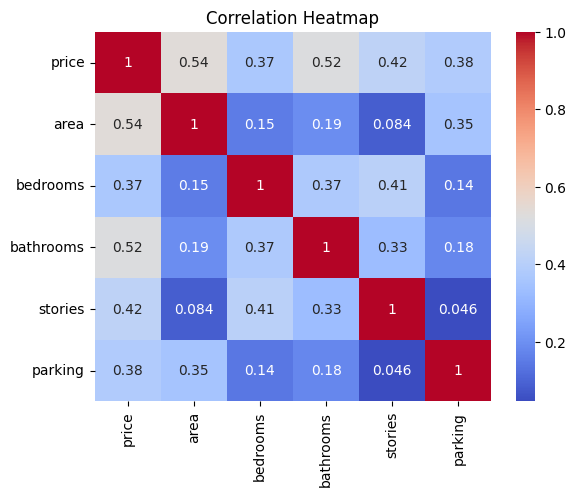

In [10]:
# Correlation heatmap for numeric features
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



Heatmap → Area dominates as the strongest driver of price (ρ = 0.54), followed closely by bathrooms. Bedrooms show weaker correlation, hinting overlap with area (more bedrooms doesn’t always = more value). Stories and parking still matter but contribute moderately.

# Target variable distribution

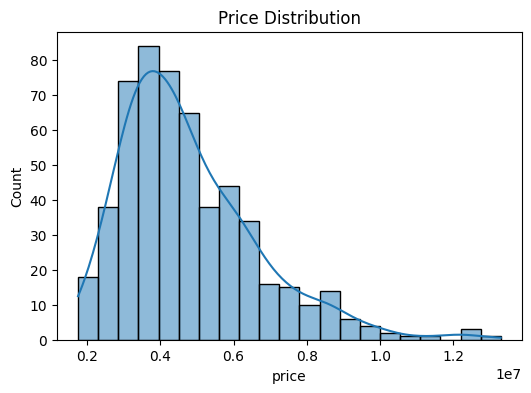

In [11]:
plt.figure(figsize=(6,4))
sns.histplot(df['price'], kde=True)
plt.title("Price Distribution")
plt.show()

Price Distribution → Skew confirms the “luxury tail” we saw in stats: while most homes cluster in the mid-market, a small group of high-end properties push the distribution far to the right.

# Numerical distributions

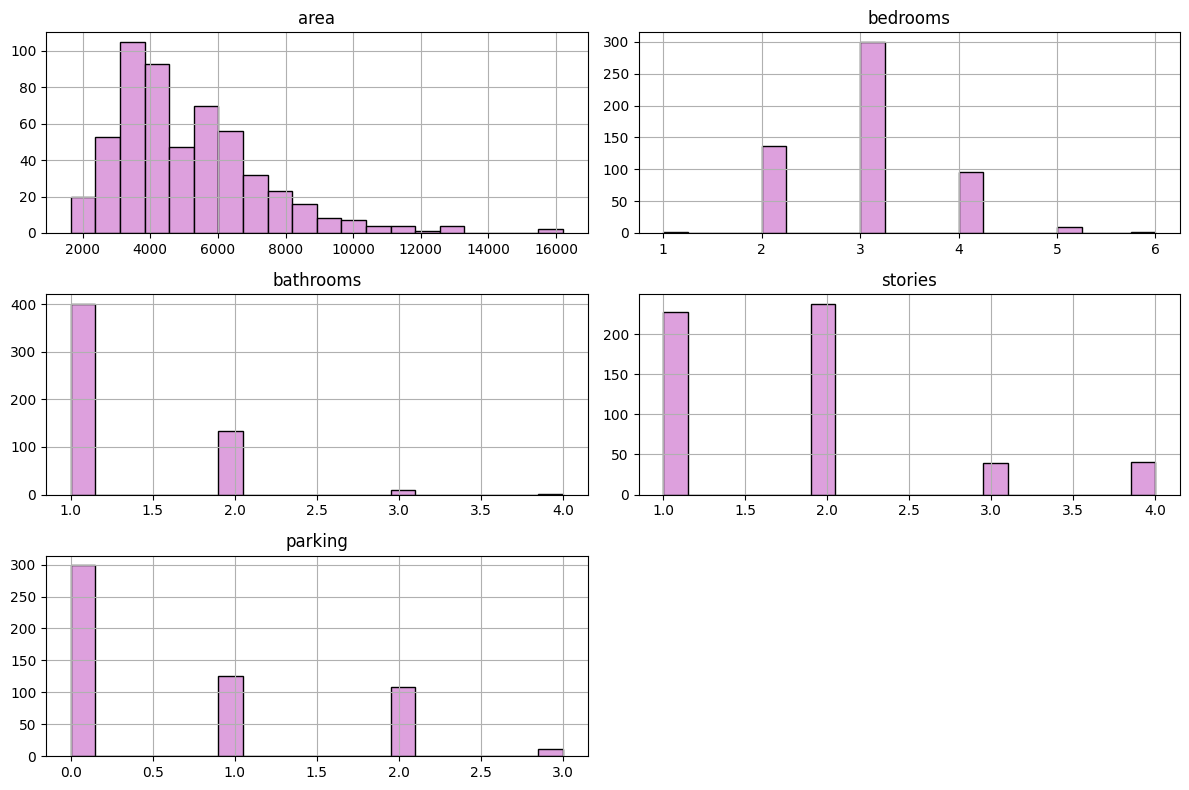

In [12]:
# Histograms for numeric columns
# Helps visualize the distribution of numeric data
num_col = ['area','bedrooms','bathrooms','stories','parking']

df[num_col].hist(figsize=(12,8), bins=20, color="plum", edgecolor='black')
plt.tight_layout()
plt.show()


# Categorical distributions

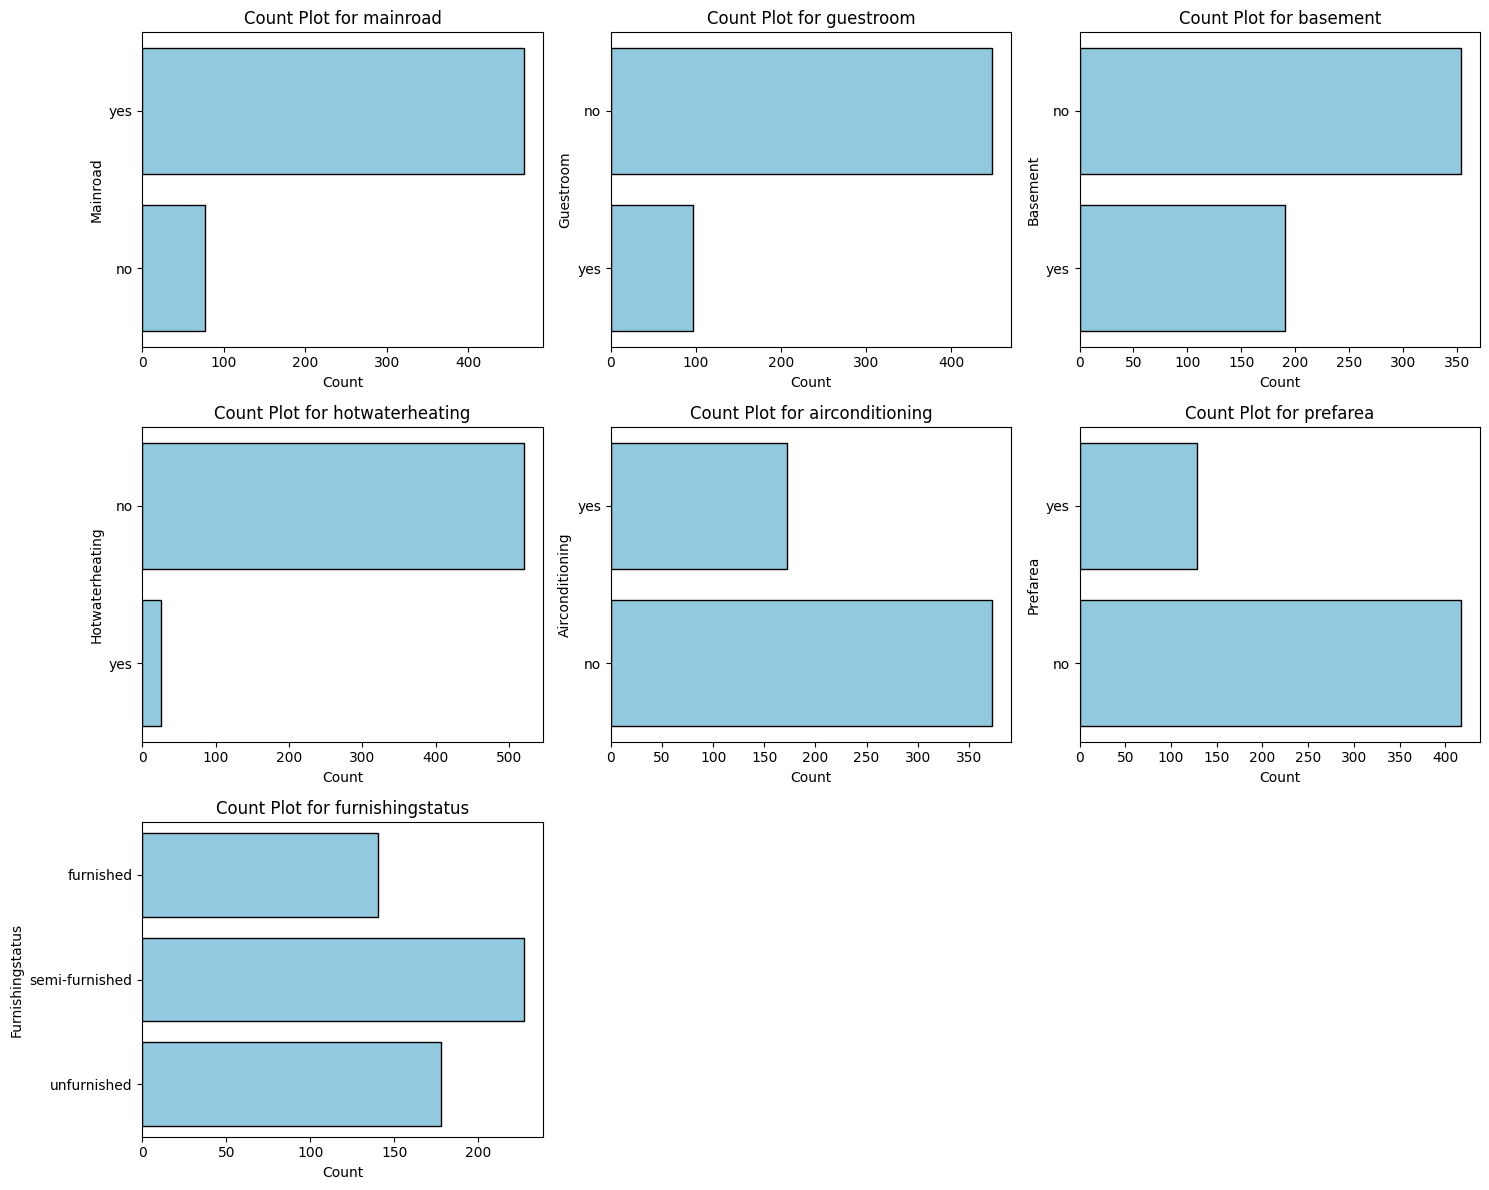

In [13]:
# Categorical counts → which features are common vs rare
# Count plots for categorical columns
plt.figure(figsize=(15, 12)) 
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)  # adjust rows/cols based on cat_cols length
    sns.countplot(y=col, data=df, color="skyblue", edgecolor="black")
    plt.title(f"Count Plot for {col}")
    plt.xlabel("Count")
    plt.ylabel(col.capitalize())

plt.tight_layout()
plt.show()

# Numerical vs Price

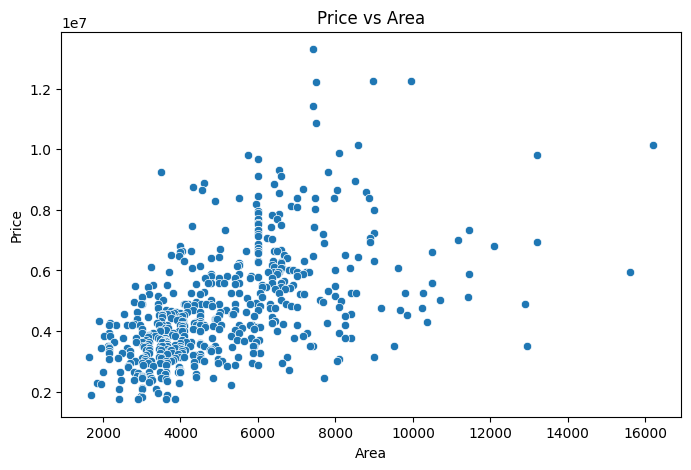

In [14]:
# Scatter Plot: Price vs Area
plt.figure(figsize=(8,5))
sns.scatterplot(x='area', y='price', data=df)
plt.title('Price vs Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()


# Scatterplot: Price vs Area

Prices rise with area, but the spread widens sharply at larger plots → luxury outliers dominate above ~10,000 sq.ft.

Mid-market cluster is dense between 3,000–6,000 sq.ft., where most properties fall.

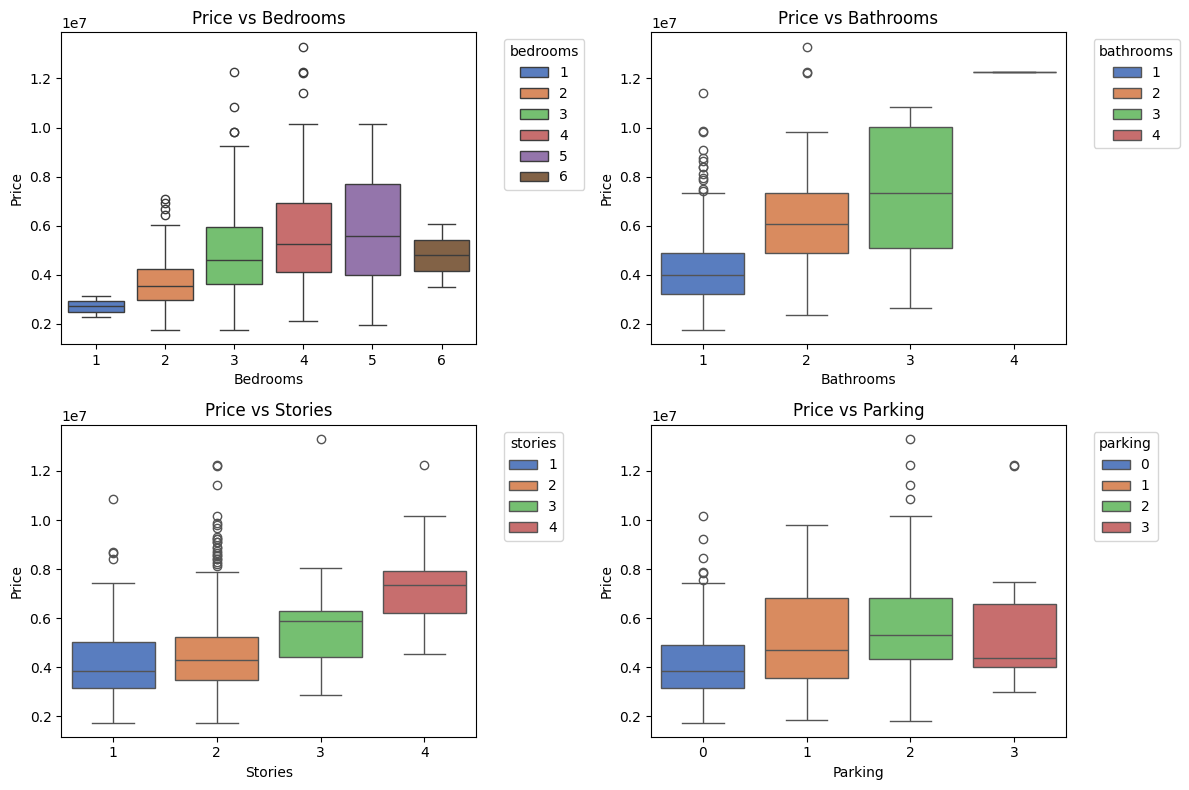

In [15]:
# Boxplots: discrete numeric variables vs price
# Shows how price varies for different counts of bedrooms, bathrooms, stories, and parking.
disc_nums = ['bedrooms', 'bathrooms', 'stories', 'parking']

plt.figure(figsize=(12, 8))
for i, col in enumerate(disc_nums, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=col, y='price', data=df, hue=col, palette="muted" , legend=True)
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title(f'Price vs {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel("Price")

plt.tight_layout()
plt.show()


Numerical Features vs Price (Boxplots: Bedrooms, Bathrooms, Stories, Parking)

Bathrooms → The clearest separator. 3–4 bathrooms consistently align with premium prices, while 1–2 keep houses mid-range.

Stories → Each additional floor bumps price, with 3–4 stories anchoring the upscale market.

Parking → More slots → higher price, but with diminishing returns after 2–3 spaces.

Bedrooms → Correlated but noisy. Beyond 3 bedrooms, the price pattern is less consistent, confirming it overlaps with area instead of standing alone as a premium marker.

# Categorical vs Price

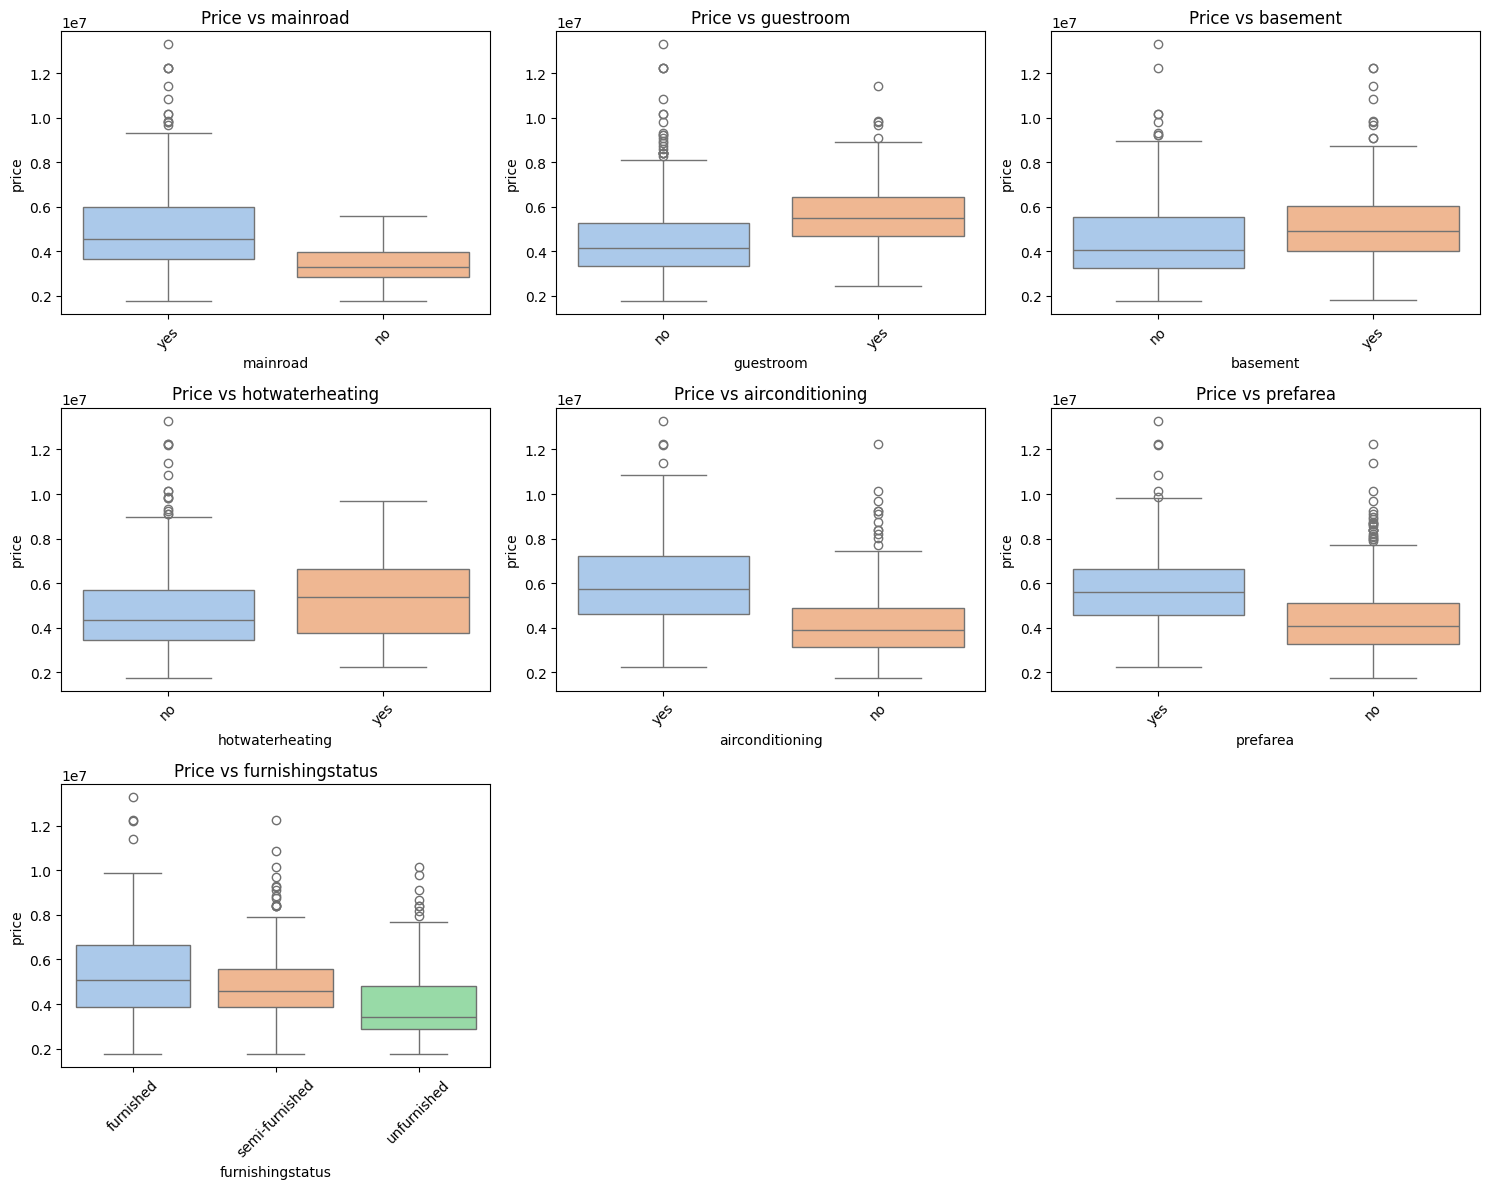

In [16]:
# Boxplots for price vs categorical variables 
# Categorical vs Price → see how AC, furnishingstatus, prefarea, etc. affect price
plt.figure(figsize=(15, 12))  

for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)  # 3 rows, 3 cols grid
    sns.boxplot(x=col, y='price', data=df, hue=col, palette="pastel", legend=False)
    plt.title(f'Price vs {col}')
    plt.xticks(rotation=45) # rotate labels for readability

plt.tight_layout()
plt.show()


Categorical Features vs Price

Mainroad → Almost all homes are on main roads, so it doesn’t explain much variance. Being off-road is the unusual case, but not strongly penalized.

Guestroom → Clear premium marker: houses with a guestroom consistently sit above those without.

Basement → Similar story — basements are rarer and generally tied to higher value.

Hotwaterheating → Extremely rare, but when present, it strongly lifts price → a “luxury niche.”

Airconditioning → A modern comfort that clearly separates higher-end homes from standard ones.

Prefarea → Location premium is visible: houses in preferred areas sell for more, reinforcing “location, location, location.”

Furnishingstatus → Splits the market neatly: furnished = high-end, semi-furnished = middle market, unfurnished = entry-level.